<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo Semanal 2
## Análisis y síntesis de filtros Activos
### Jorge Andres Niño


Se analiza el circuito presentado en a continuación, obteniendo la respuesta en frecuencia, donde $H_0(s)=\frac{V_o}{V_i}$ en función de $\omega _0$ y $Q$. Por otra parte para la transferencia obtenida, se calcula la red para que $\omega _0 = 1$ y $Q = 3$ y además analizamos $R1$ para que $|T(0)| = 20 db$.

![*Figura 1*](ackemoss.png)

## Analísis del función transferencia.

In [1]:
from IPython.display import IFrame, display
IFrame("./TS2_RES.pdf", width=1000, height=1000)

### Respuesta en frecuencia, fase y diagrama de polos y ceros.

A continuación vamos a simular en python la función transferencia obtenida, para los parametros pedidos, y luego verificaremos con LTSPICE, lo obtenido en la simulación numerica

In [2]:
# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

from scipy import signal as Funcion
import numpy as np
import matplotlib.pyplot as plt


# las librerías que usarremos las cargamos solo una vez.

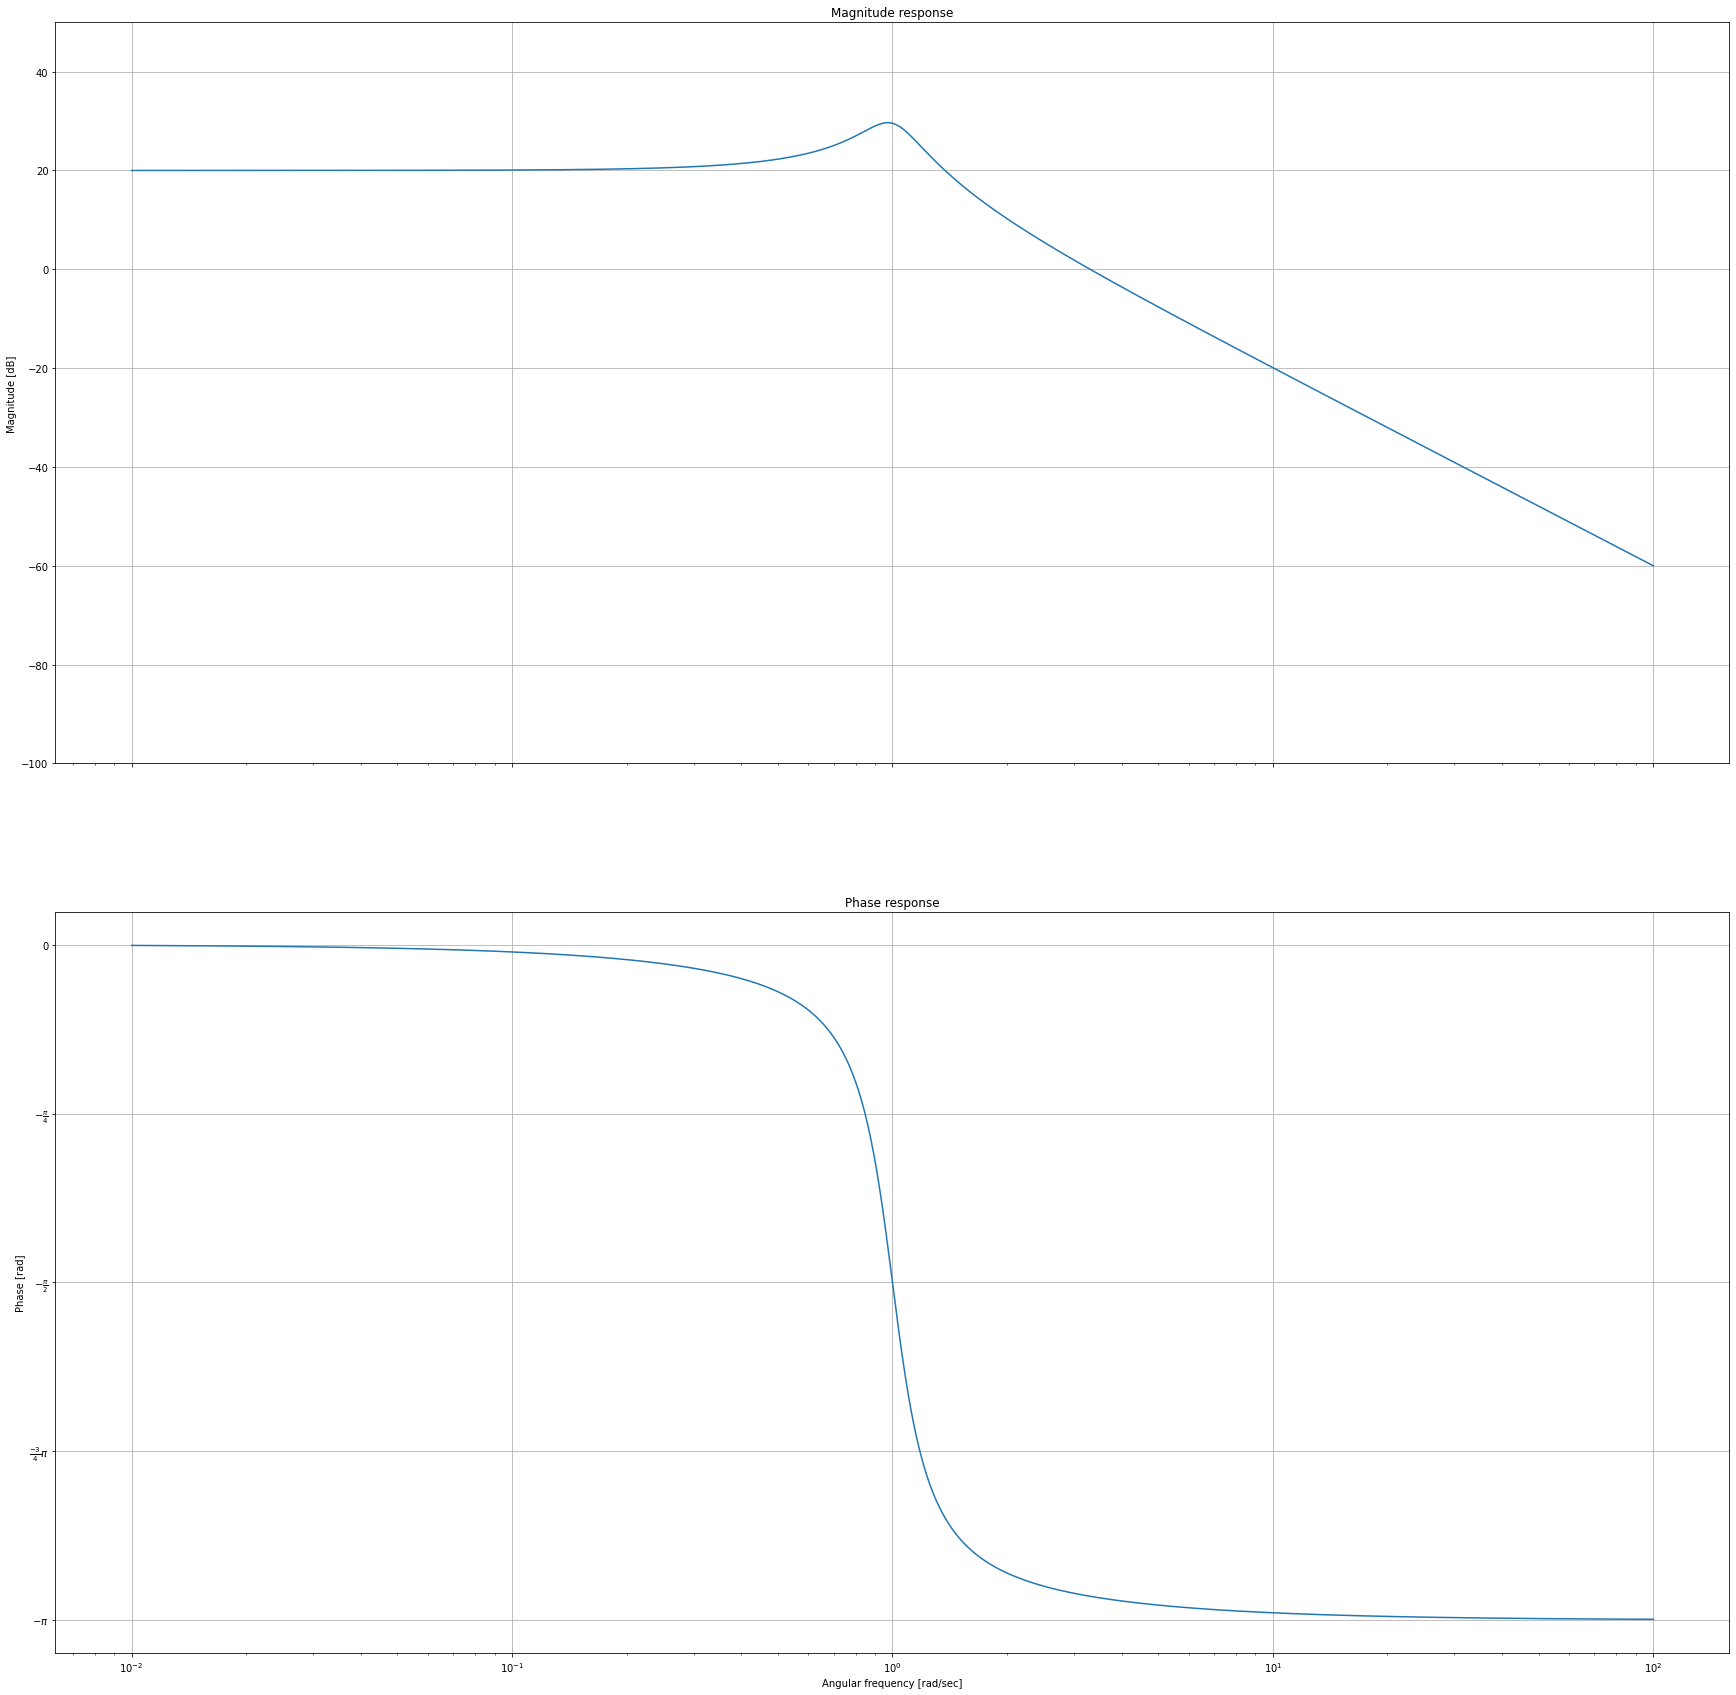

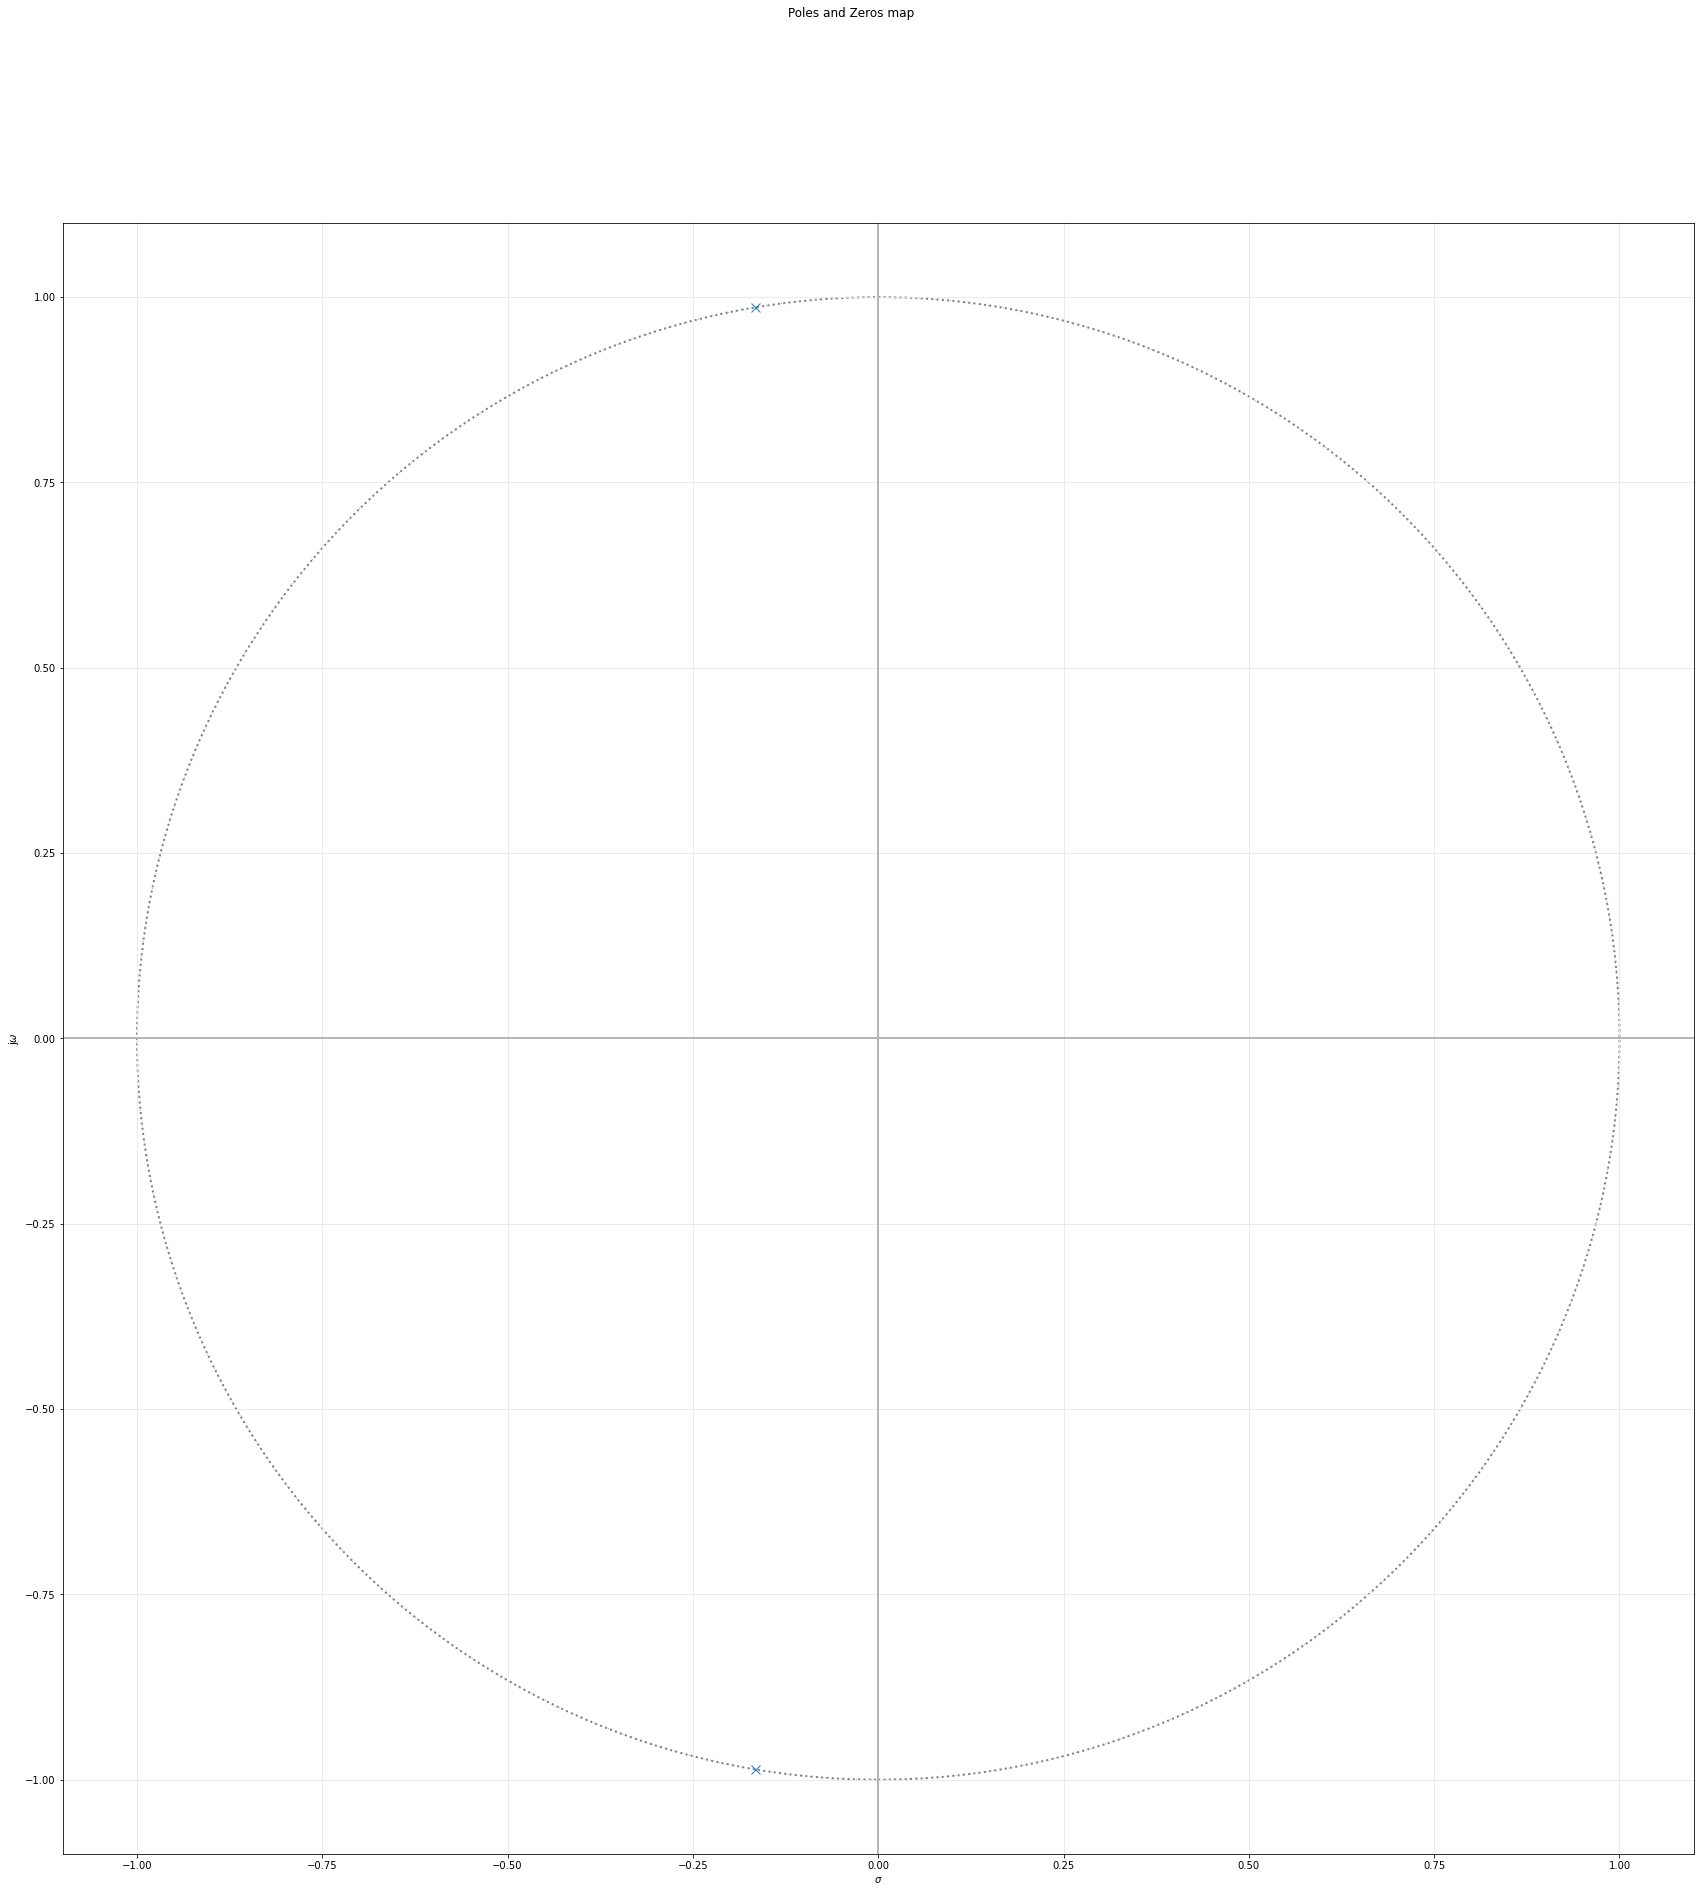

In [4]:
#%% Funcion trasnferencia:

w0 = 1
qq=3

num = np.array([ 10*w0**2 ])
den = np.array([w0, w0/qq, w0**2 ])

H1 = Funcion.TransferFunction( num, den )
# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.
_, axes_hdl = bodePlot(H1)
# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
plt.ylim([-100,50])
plt.gca
pzmap(H1)
plt.rcParams['figure.figsize'] = (30,30)
plt.show()


Simulamos el sistema con valores normalizados en LTSPICE. Recordemos que entonces vamos a graficar en función de la frecuencia y no de la pulsación angular, con lo cual debemos determinar cual sera la frecuencia central que nos dara la simulación. Para ello obtenemos $f_0 = \frac {\omega _0}{2*\pi}$ con lo cual $f_0 = 159,23 Hz$. Podemos correr ese centro parametrizando $\omega _0 = 2*\pi$. Se realiza el mismo considerando entonces $R3$ para el $Q$, $R1$ para el $K$ y $R8, R2$ para la respuesta en frecuencia.
A continuación se muestran el circuito correspondiente y la respuesta en frecuencia en modulo y fase obtenidas:

![*Figura 6*](LTCIRC.png)

![*Figura 7*](LTSIM.png)

En la figura de la respuesta en frecuencia podemos observar el corrimiento a $1Hz$ de la frecuencia central gracias a modificar todas las resistencias, sin necesidad de tocar el valor de los capacitores. Podemos ver que a $1Hz$ tenemos el sobreimpulso y luego la frecuencia a la cual tenemos la atenuación de $3 db$.

### Estudio de Sensibilidad

In [2]:
from IPython.display import IFrame, display
IFrame("./sens.pdf", width=1000, height=1000)

### Filtro Butterworth

Para que la función transferencia cumpla la función Butterworth, es necesario ubicar los polos (para este polinomio grado 2) en un ángulo de $45°$, para lo cual debemos hacer según la formula:$$Q=\frac{1}{2cos \phi}$$ con lo cual nos estaría quedando para ese angulo en particular, $$Q = \frac{1}{\sqrt{2}}$$ con lo cual la funcion transferencia normalizada nos indica que solo debemos mover el valor de $R2 = \frac{1}{\sqrt{2}} $ que modifica el $Q$ y la función queda de la forma: $$H(s) = \frac{1}{s^2 + s\frac{1}{\sqrt{2}}+1}$$

#### Simulación

Se realizo la simulación en LTSPICE, modificando esta resistencia de ajuste de Q, verificando que se obtiene la respuesta de butterworth, como se observa a continuación:

![*Figura 8*](butter_circ.png)

![*Figura 9*](butter_resp.png)

Podemos observar que aquí la atenuación de $-3db$ se da a $f_0=0.997Hz$

# Conclusiones:
 * Obtuvimos en la salida correspondiente al circuito la respuesta de un filtro pasabajos de segundo orden.
 * Una conlusión interesante de esta configuración es que el $Q$ se ajusta con el valor de $R2$ mientras que la ganancia se ajusta inversamente con el valor de $R1$ respecto del valor de las dos $R3$.
 * La frecuencia se ajusta solo con $R3$ y $C$ con lo cual podemos obtener un ajuste de la respuesta en frecuencia independiente del $Q$ del sistema